In [1]:
import os
os.chdir("..")

from src.data import extract
from src.visualization import plots
from src.descriptors import grayscale, rgb, hsv, lab, ycbcr
from src.distances import bhattacharyya, canberra, chi_2, euclidean, jensen_shannon, l1, cosine, hellinger, histogram_intersection

# Paths
BBDD_DIR = "data/raw/BBDD"
QSD1_DIR = "data/raw/qsd1_w1"

# Content Based Image Retrieval - Week 1

This notebook explores the museum dataset (BBDD) and the query set (QSD1).  
We:
- Visualize some sample images.
- Convert them to different colour spaces (Gray, HSV, Lab).
- Plot their histograms according to our descriptors.
- Compute similarity distances between selected BBDD images and one query image.

This helps us understand how our descriptors behave before doing full retrieval and mAP evaluation.

1. [BBDD Dataset](#1-bbdd-dataset)
    - 1.1 [Gray-level Histogram](#11-gray-level-histogram)
        - 1.1.1 [Image bbdd_00000.jpg](#111-image-bbdd_00000jpg)
        - 1.1.2 [Image bbdd_00013.jpg](#112-image-bbdd_00013jpg)
        - 1.1.3 [Image bbdd_00045.jpg](#113-image-bbdd_00045jpg)
    - 1.2 [Concatenated HSV Histogram](#12-concatenated-hsv-histogram)
        - 1.2.1 [Image bbdd_00000.jpg](#121-image-bbdd_00000jpg)
        - 1.2.2 [Image bbdd_00013.jpg](#122-image-bbdd_00013jpg)
        - 1.2.3 [Image bbdd_00045.jpg](#123-image-bbdd_00045jpg)
    - 1.3 [Concatenated Lab Histogram](#13-concatenated-lab-histogram)
        - 1.3.1 [Image bbdd_00000.jpg](#131-image-bbdd_00000jpg)
        - 1.3.2 [Image bbdd_00013.jpg](#132-image-bbdd_00013jpg)
        - 1.3.3 [Image bbdd_00045.jpg](#133-image-bbdd_00045jpg)
    - 1.4 [Concatenated RGB Histogram](#14-concatenated-rgb-histogram)
        - 1.4.1 [Image bbdd_00000.jpg](#141-image-bbdd_00000jpg)
        - 1.4.2 [Image bbdd_00013.jpg](#142-image-bbdd_00013jpg)
        - 1.4.3 [Image bbdd_00045.jpg](#143-image-bbdd_00045jpg)

2. [QSD1 Dataset](#2-qsd1-dataset)
    - 2.1 [Gray-level Histogram](#21-gray-level-histogram)
        - 2.1.1 [Image 00000.jpg](#211-image-00000jpg)
    - 2.2 [Concatenated HSV Histogram](#22-concatenated-hsv-histogram)
        - 2.2.1 [Image 00000.jpg](#221-image-00000jpg)
    - 2.3 [Concatenated Lab Histogram](#23-concatenated-lab-histogram)
        - 2.3.1 [Image 00000.jpg](#231-image-00000jpg)
    - 2.4 [Concatenated RGB Histogram](#24-concatenated-rgb-histogram)
        - 2.4.1 [Image 00000.jpg](#241-image-00000jpg)
    - 2.5 [Concatenated YCbCr Histogram](#25-concatenated-ycbcr-histogram)
        - 2.5.1 [Image 00000.jpg](#251-image-00000jpg)

3. [Similarity Metrics between BBDD and QSD1](#3-similarity-metrics-between-bbdd-and-qsd1)
    - 3.1 [Euclidean Distance](#31-euclidean-distance)
    - 3.2 [L1 Distance](#32-l1-distance)
    - 3.3 [Cosine Similarity](#33-cosine-similarity)
    - 3.4 [Hellinger Distance](#34-hellinger-distance)
    - 3.5 [Chi-squared Distance](#35-chi-squared-distance)
    - 3.6 [Histogram Intersection](#36-histogram-intersection)
    - 3.7 [Bhattacharyya Distance](#37-bhattacharyya-distance)
    - 3.8 [Canberra Distance](#38-canberra-distance)
    - 3.9 [Jeffrey Divergence](#39-jeffrey-divergence)

## 1. BBDD dataset




### 1.1 Gray-level Histogram

#### 1.1.1 Image `bbdd_00000.jpg`

In [2]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

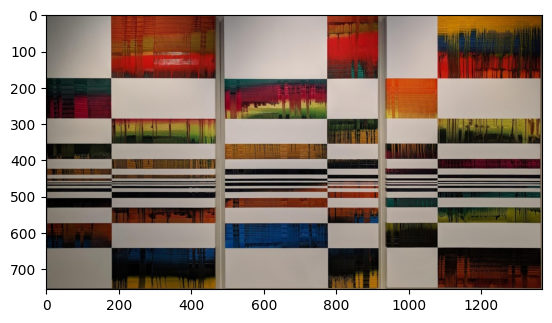

In [3]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

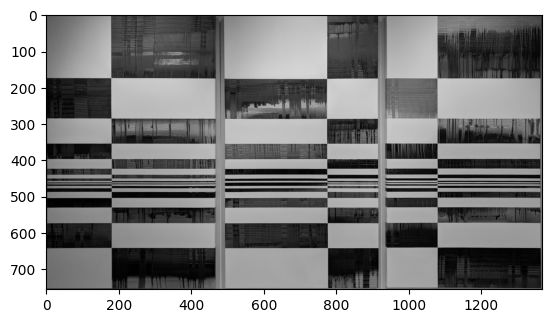

In [4]:
img1_gray = grayscale.convert_img_to_gray_scale(img1)
plots.display_image(img1_gray)

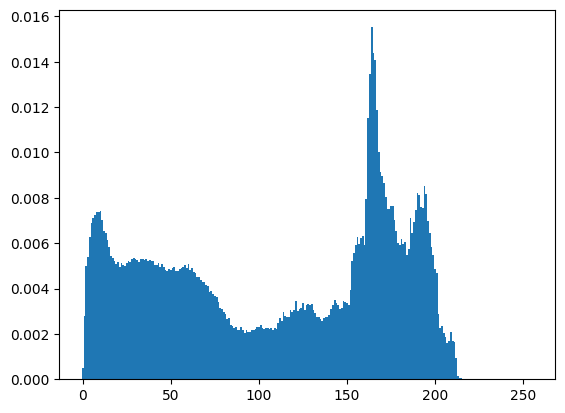

In [5]:
hist1_gray, bin_edges = grayscale.compute_grayscale_histogram(image1_filepath)
plots.display_histogram(hist1_gray, bin_edges)



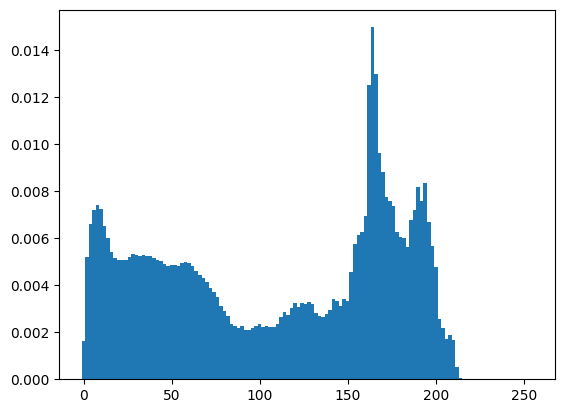

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.]


In [6]:
hist1_gray_2valsbin, bin_edges = grayscale.compute_grayscale_histogram(image1_filepath, values_per_bin=2)
plots.display_histogram(hist1_gray_2valsbin, bin_edges)
print(bin_edges[:10])

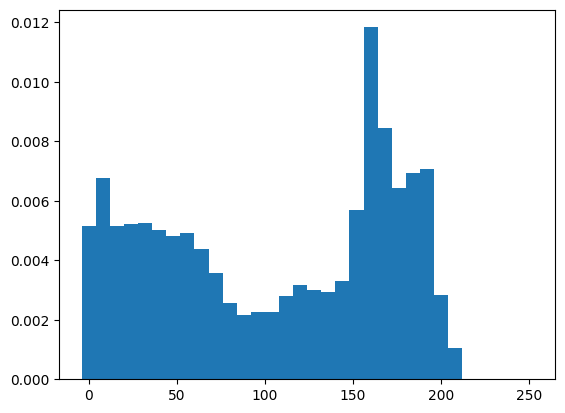

[ 0.  8. 16. 24. 32. 40. 48. 56. 64. 72.]


In [7]:
hist1_gray_20valsbin, bin_edges = grayscale.compute_grayscale_histogram(image1_filepath, values_per_bin=8)
plots.display_histogram(hist1_gray_20valsbin, bin_edges)
print(bin_edges[:10])

#### 1.1.2 Image `bbdd_00013.jpg`

In [8]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

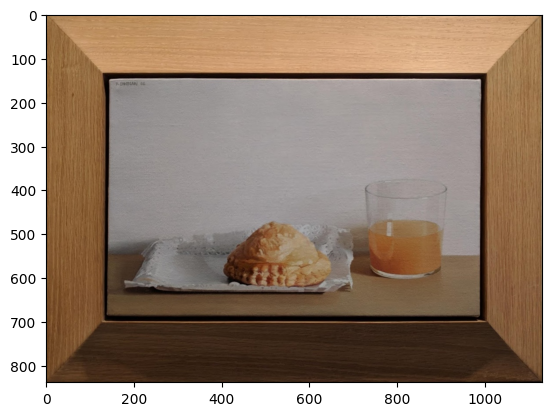

In [9]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

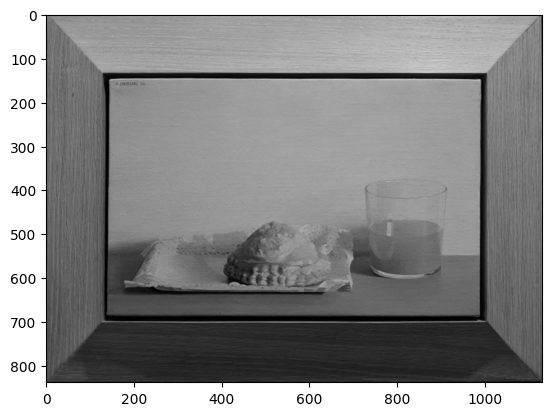

In [10]:
img2_gray = grayscale.convert_img_to_gray_scale(img2)
plots.display_image(img2_gray)

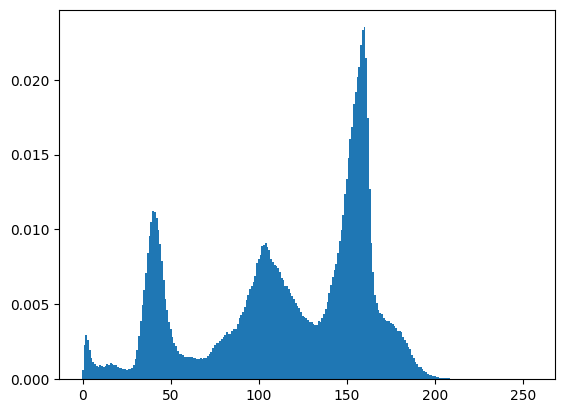

In [11]:
hist2_gray, bin_edges = grayscale.compute_grayscale_histogram(image2_filepath)
plots.display_histogram(hist2_gray, bin_edges)

#### 1.1.3 Image `bbdd_00045.jpg`

In [12]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

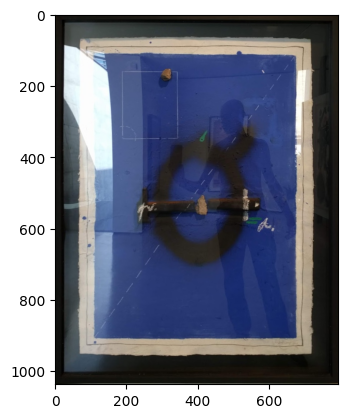

In [13]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

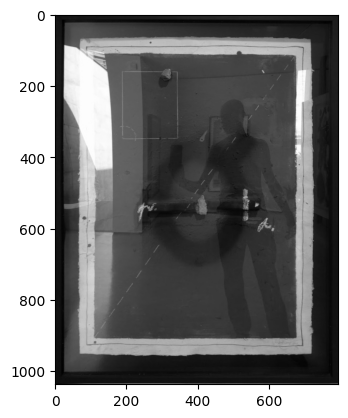

In [14]:
img3_gray = grayscale.convert_img_to_gray_scale(img3)
plots.display_image(img3_gray)

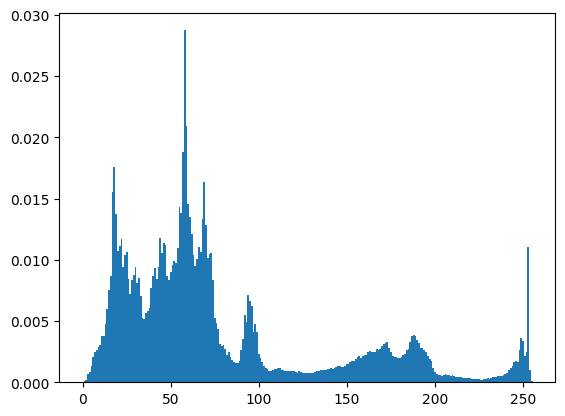

In [15]:
hist3_gray, bin_edges = grayscale.compute_grayscale_histogram(image3_filepath)
plots.display_histogram(hist3_gray, bin_edges)

### 1.2 Concatenated HSV Histogram


#### 1.2.1 Image `bbdd_000000.jpg`

In [16]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

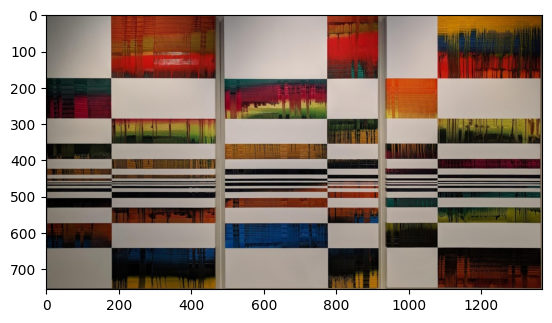

In [17]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

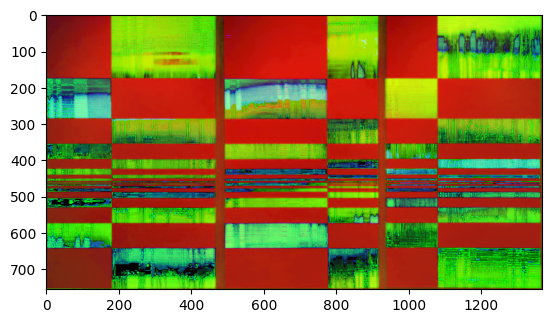

In [18]:
img1_hsv = hsv.convert_img_to_hsv(img1)
plots.display_image(img1_hsv)

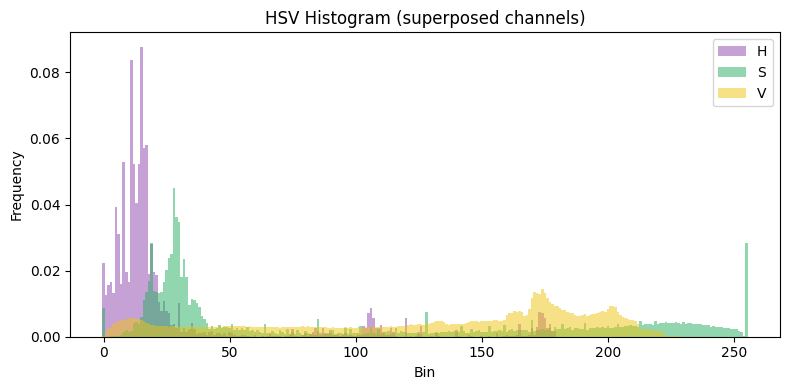

In [19]:
hist1_hsv, bin_edges = hsv.compute_hsv_histogram(image1_filepath)
plots.display_hsv_histogram(hist1_hsv, bin_edges)


#### 1.2.2 Image `bbdd_00013.jpg`

In [20]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

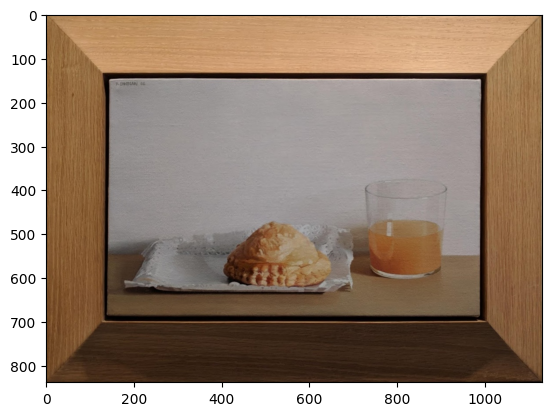

In [21]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

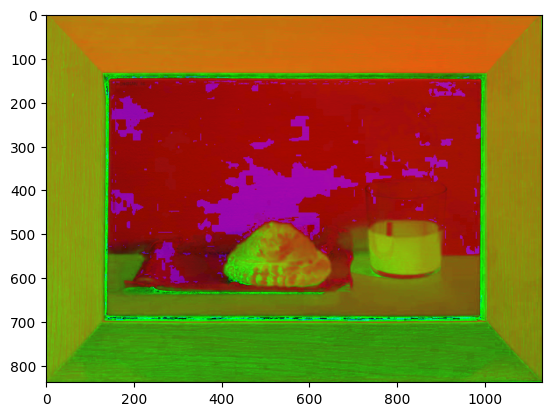

In [22]:
img2_hsv = hsv.convert_img_to_hsv(img2)
plots.display_image(img2_hsv)

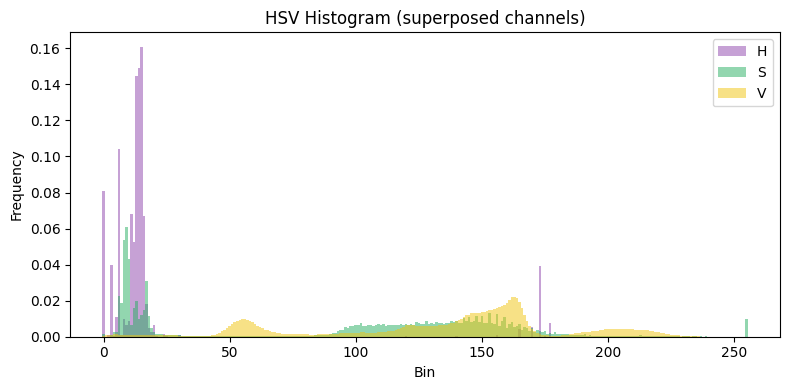

In [23]:
hist2_hsv, bin_edges = hsv.compute_hsv_histogram(image2_filepath)
plots.display_hsv_histogram(hist2_hsv, bin_edges)

#### 1.2.3 Image `bbdd_00045.jpg`

In [24]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

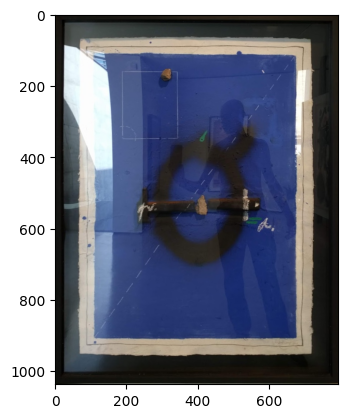

In [25]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

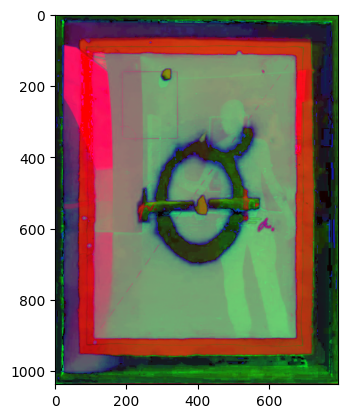

In [26]:
img3_hsv = hsv.convert_img_to_hsv(img3)
plots.display_image(img3_hsv)

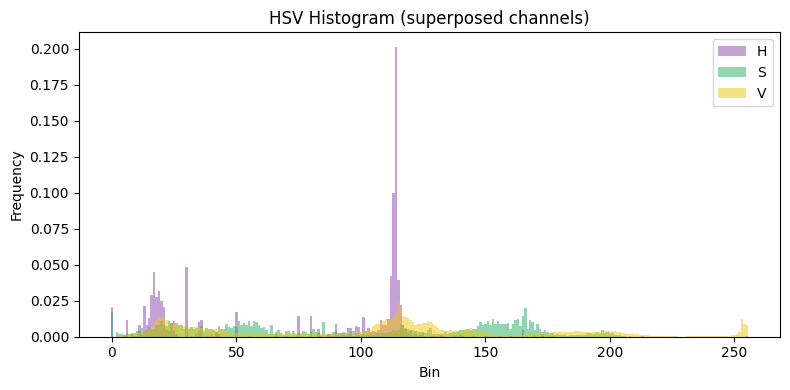

In [27]:
hist3_hsv, bin_edges = hsv.compute_hsv_histogram(image3_filepath)
plots.display_hsv_histogram(hist3_hsv, bin_edges)

### 1.3 Concatenated Lab Histogram

#### 1.3.1 Image `bbdd_00000.jpg`

In [28]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

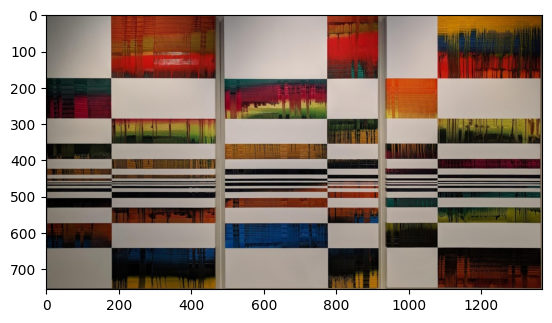

In [29]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

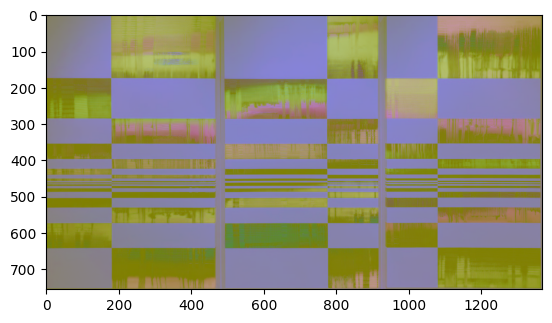

In [30]:
img1_lab = lab.convert_img_to_lab(img1)
plots.display_image(img1_lab)

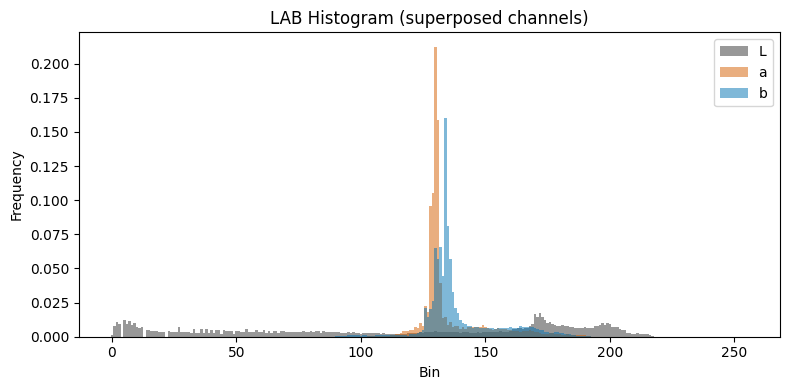

In [31]:
hist1_lab, bin_edges = lab.compute_lab_histogram(image1_filepath)
plots.display_lab_histogram(hist1_lab, bin_edges)


#### 1.3.2 Image `bbdd_00013.jpg`

In [32]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

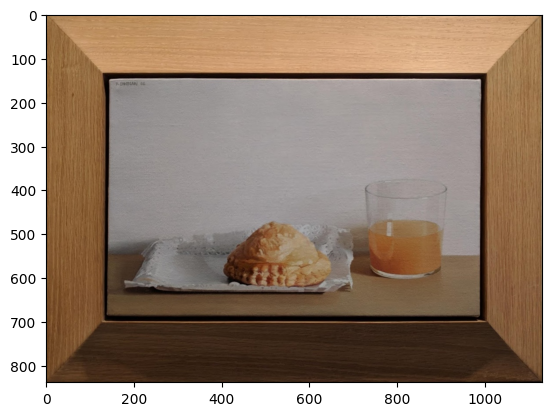

In [33]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

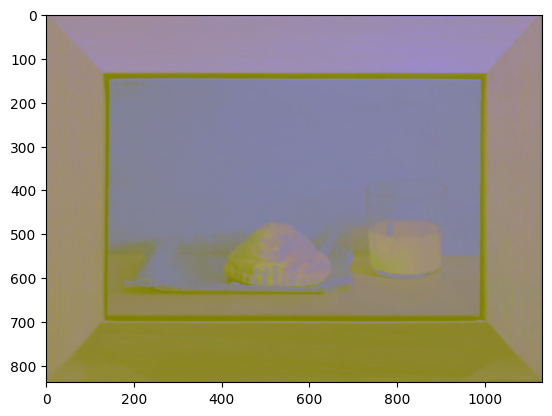

In [34]:
img2_lab = lab.convert_img_to_lab(img2)
plots.display_image(img2_lab)

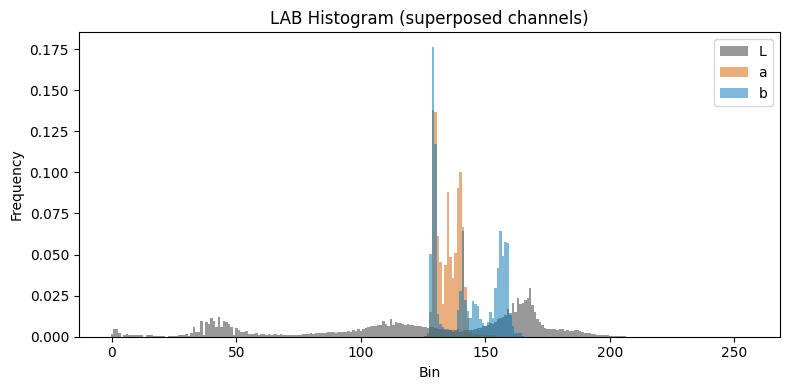

In [35]:
hist2_lab, bin_edges = lab.compute_lab_histogram(image2_filepath)
plots.display_lab_histogram(hist2_lab, bin_edges)

#### 1.3.3 Image `bbdd_00045.jpg`

In [36]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

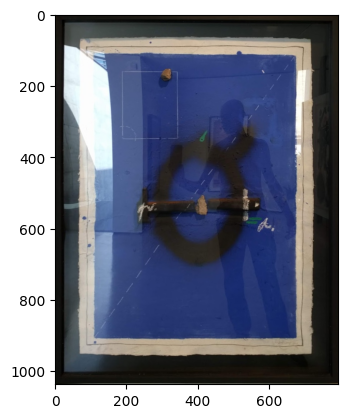

In [37]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

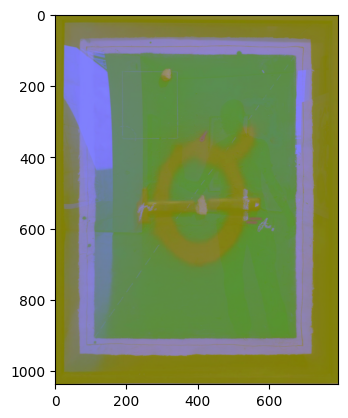

In [38]:
img3_lab = lab.convert_img_to_lab(img3)
plots.display_image(img3_lab)

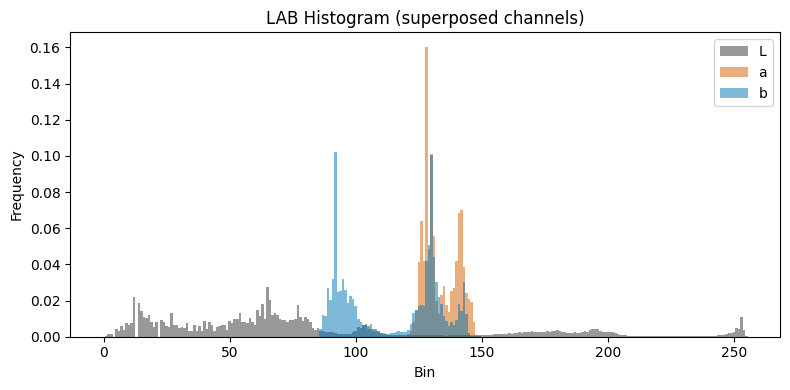

In [39]:
hist3_lab, bin_edges = lab.compute_lab_histogram(image3_filepath)
plots.display_lab_histogram(hist3_lab, bin_edges)

### 1.4 Concatenated RGB Histogram

#### 1.4.1 Image `bbdd_00000.jpg`

In [40]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

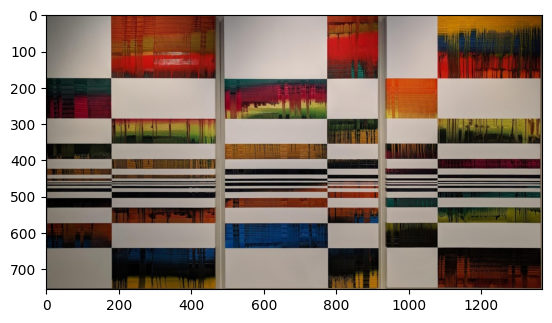

In [41]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

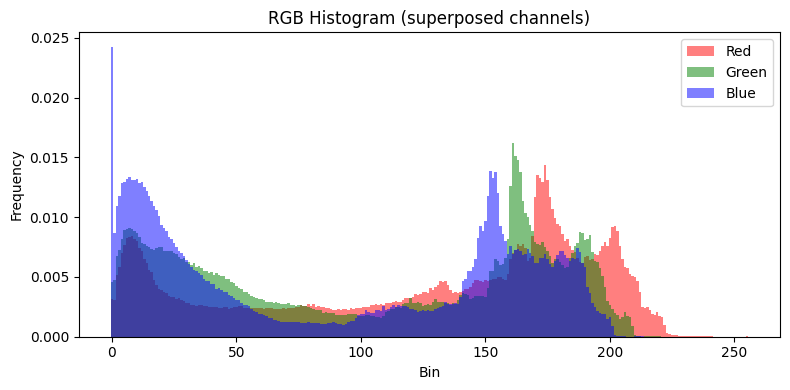

In [42]:
hist1_rgb, bin_edges = rgb.compute_rgb_histogram(image1_filepath)
plots.display_rgb_histogram(hist1_rgb, bin_edges)

#### 1.4.2 Image `00013.jpg`

In [80]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

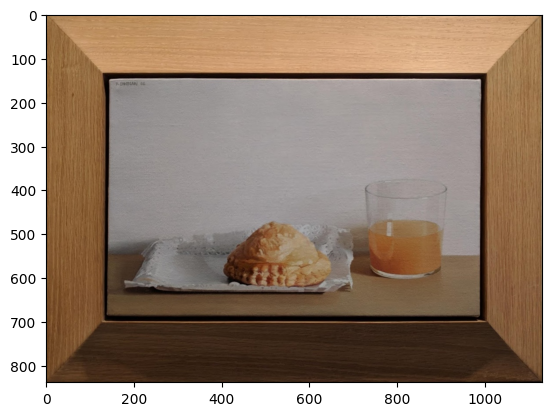

In [81]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

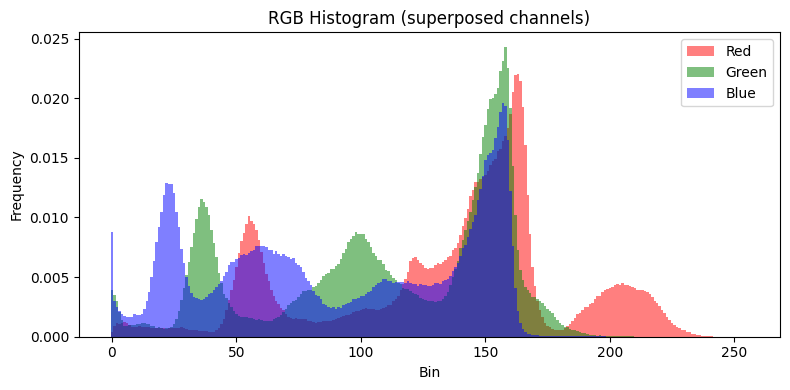

In [82]:
hist2_rgb, bin_edges = rgb.compute_rgb_histogram(image2_filepath)
plots.display_rgb_histogram(hist2_rgb, bin_edges)

#### 1.4.3 Image `bbdd_00045.jpg`

In [83]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

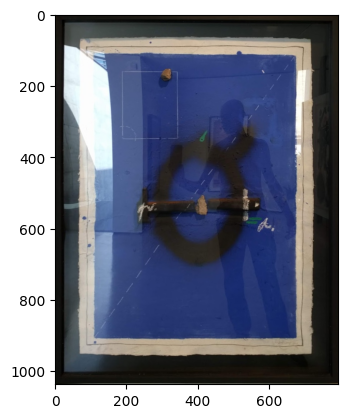

In [84]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

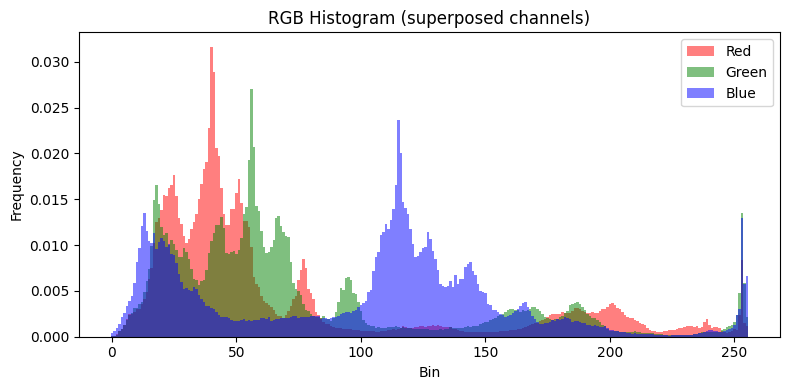

In [85]:
hist3_rgb, bin_edges = rgb.compute_rgb_histogram(image3_filepath)
plots.display_rgb_histogram(hist3_rgb, bin_edges)

### 1.5 Concatenated YCbCr Histogram

#### 1.5.1 Image `bbdd_00000.jpg`

In [46]:
image1_filepath = os.path.join(BBDD_DIR, "bbdd_00000.jpg")

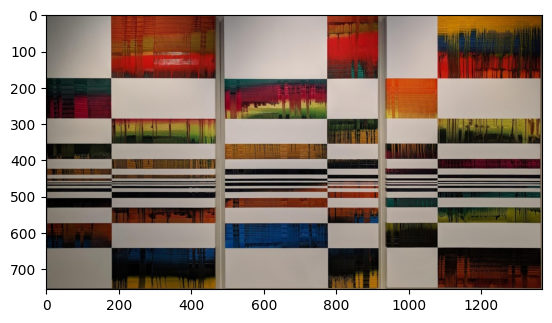

In [47]:
img1 = extract.read_image(image1_filepath)
plots.display_image(img1)

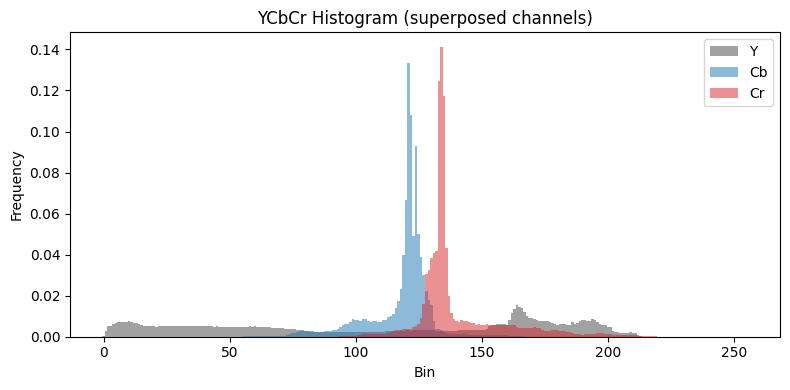

In [48]:
hist1_ycbcr, bin_edges = ycbcr.compute_ycbcr_histogram(image1_filepath)
plots.display_ycbcr_histogram(hist1_ycbcr, bin_edges)

#### 1.5.2 Image `bbdd_00013.jpg`

In [49]:
image2_filepath = os.path.join(BBDD_DIR, "bbdd_00013.jpg")

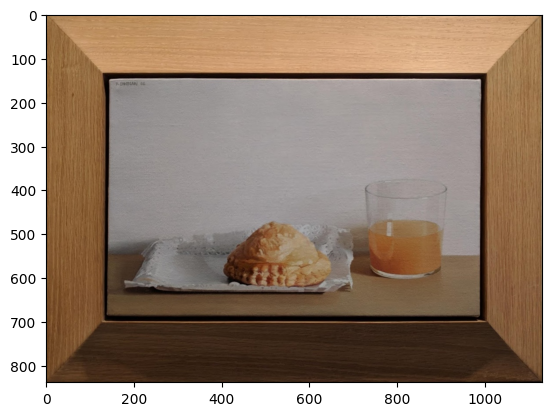

In [50]:
img2 = extract.read_image(image2_filepath)
plots.display_image(img2)

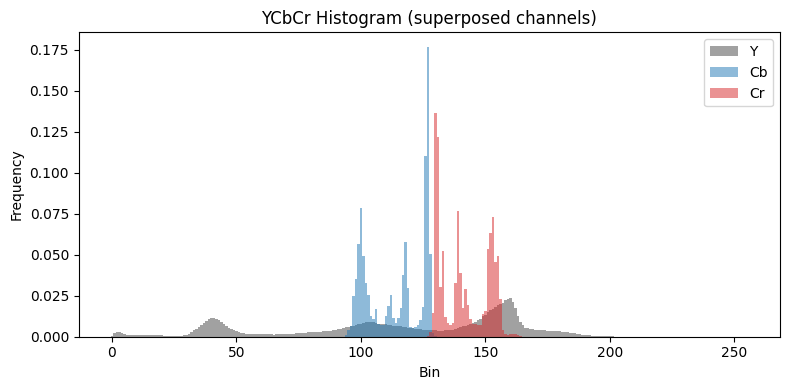

In [51]:
hist2_ycbcr, bin_edges = ycbcr.compute_ycbcr_histogram(image2_filepath)
plots.display_ycbcr_histogram(hist2_ycbcr, bin_edges)

#### 1.5.3 Image `bbdd_00045.jpg`

In [52]:
image3_filepath = os.path.join(BBDD_DIR, "bbdd_00045.jpg")

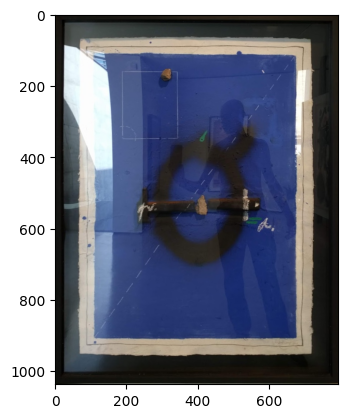

In [53]:
img3 = extract.read_image(image3_filepath)
plots.display_image(img3)

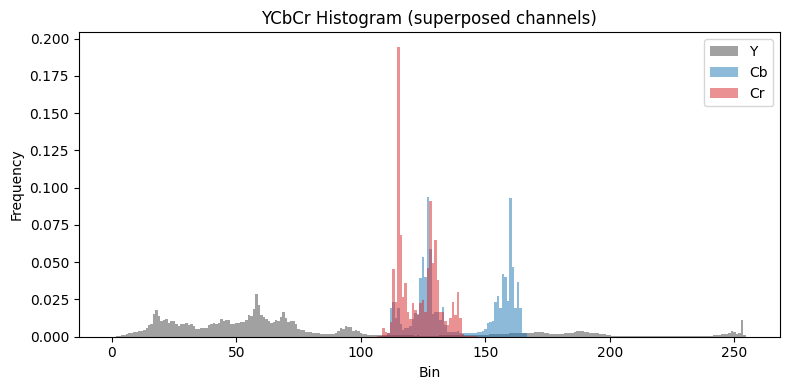

In [54]:
hist3_ycbcr, bin_edges = ycbcr.compute_ycbcr_histogram(image3_filepath)
plots.display_ycbcr_histogram(hist3_ycbcr, bin_edges)

## 2. QSD1 dataset

### 2.1 Gray-level Histogram

#### 2.1.1 Image `00000.jpg`

In [55]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

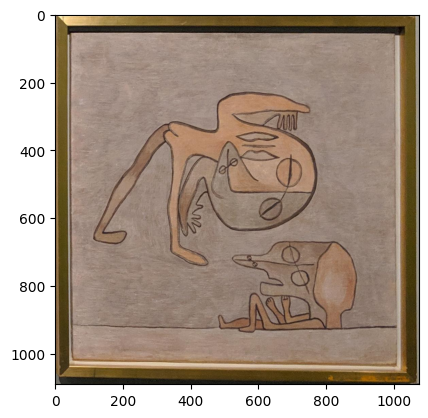

In [56]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

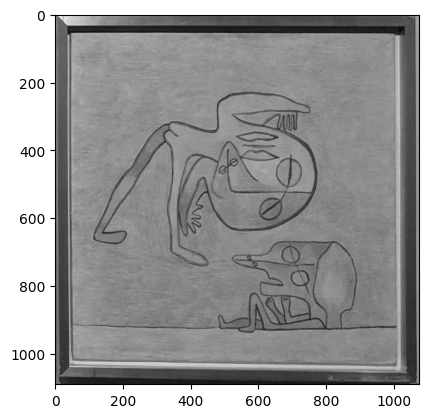

In [57]:
img4_gray = grayscale.convert_img_to_gray_scale(img4)
plots.display_image(img4_gray)

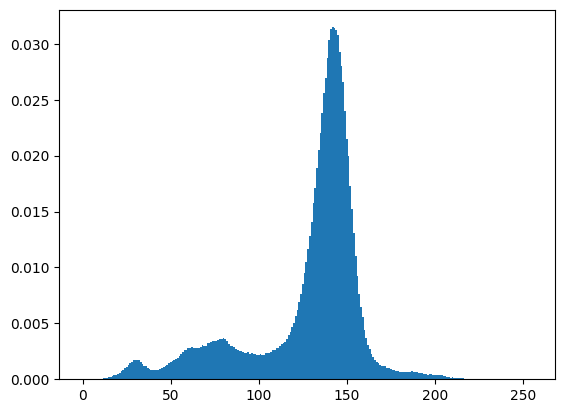

In [58]:
hist4_gray, bin_edges = grayscale.compute_grayscale_histogram(image4_filepath)
plots.display_histogram(hist4_gray, bin_edges)

### 2.2 Concatenated HSV Histogram

### 2.2.1 Image `00000.jpg`

In [59]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

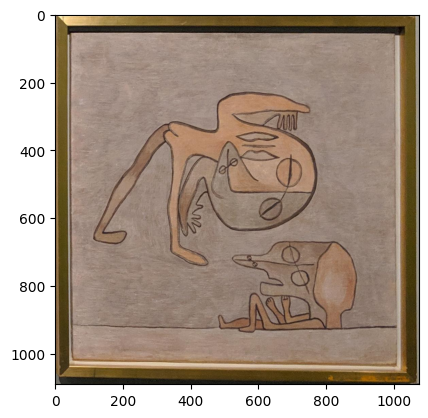

In [60]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

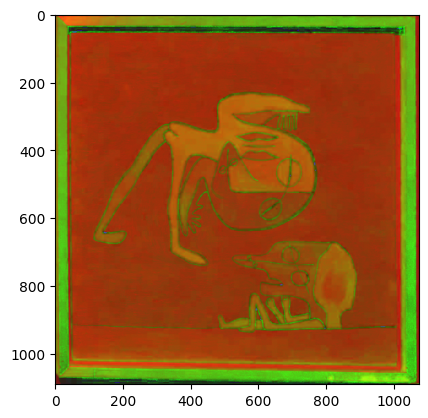

In [61]:
img4_hsv = hsv.convert_img_to_hsv(img4)
plots.display_image(img4_hsv)

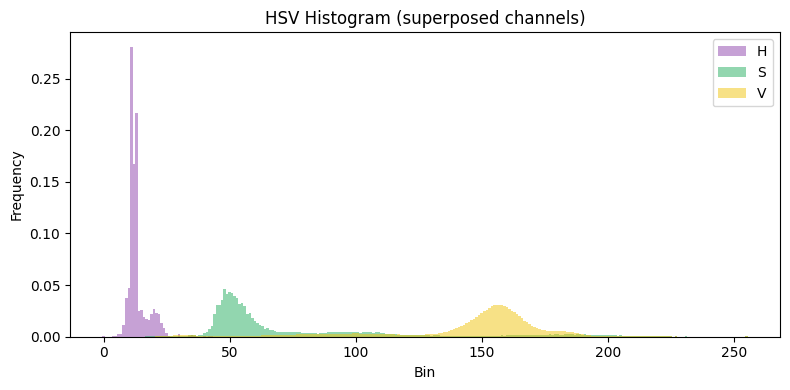

In [62]:
hist4_hsv, bin_edges = hsv.compute_hsv_histogram(image4_filepath)
plots.display_hsv_histogram(hist4_hsv, bin_edges)

### 2.3 Concatenated Lab Histogram

#### 2.3.1 Image `00000.jpg`

In [63]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

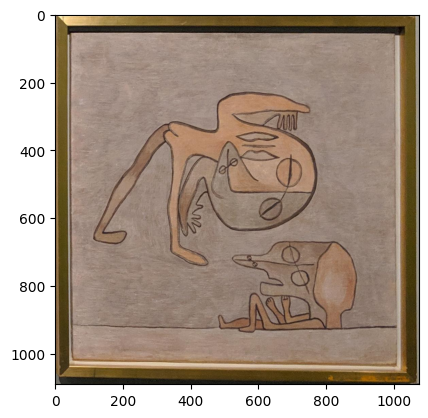

In [64]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

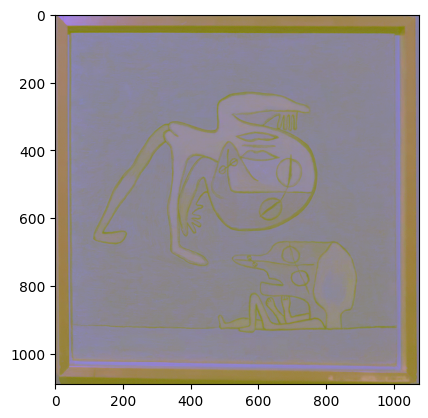

In [65]:
img4_lab = lab.convert_img_to_lab(img4)
plots.display_image(img4_lab)

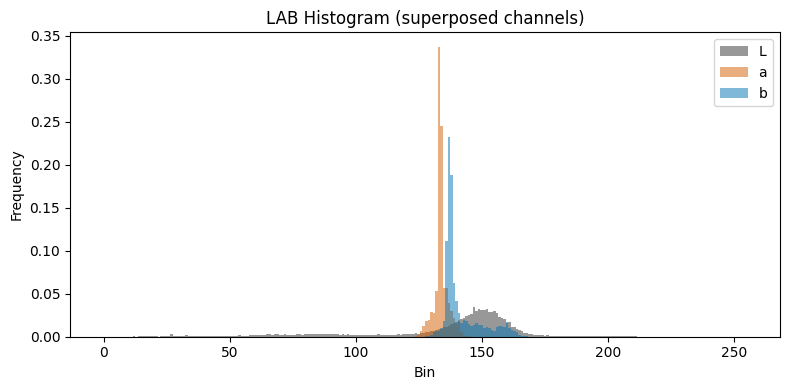

In [66]:
hist4_lab, bin_edges = lab.compute_lab_histogram(image4_filepath)
plots.display_lab_histogram(hist4_lab, bin_edges)

### 2.4 Concatenated RGB Histogram

#### 2.4.1 Image `00000.jpg`

In [67]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

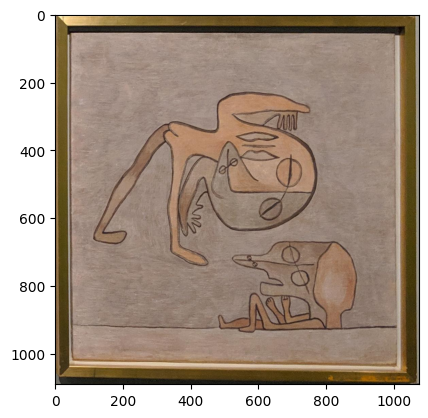

In [68]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

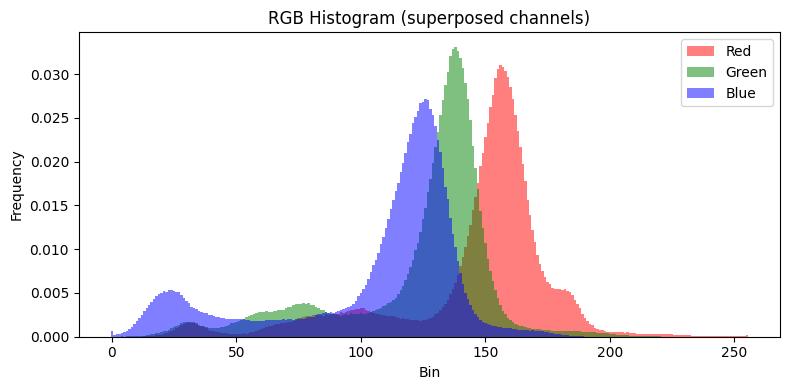

In [71]:
hist4_rgb, bin_edges = rgb.compute_rgb_histogram(image4_filepath)
plots.display_rgb_histogram(hist4_rgb, bin_edges)

### 2.5 Concatenated YCbCr Histogram

#### 2.5.1 Image `00000.jpg`

In [72]:
image4_filepath = os.path.join(QSD1_DIR, "00000.jpg")

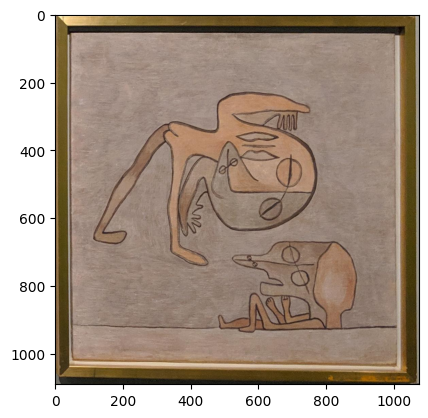

In [73]:
img4 = extract.read_image(image4_filepath)
plots.display_image(img4)

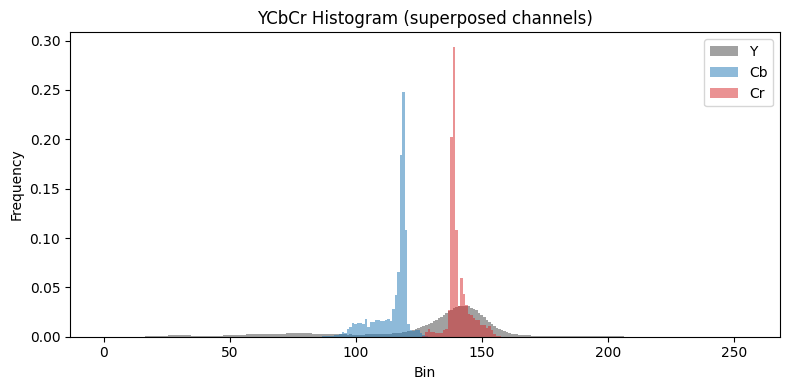

In [74]:
hist4_ycbcr, bin_edges = ycbcr.compute_ycbcr_histogram(image4_filepath)
plots.display_ycbcr_histogram(hist4_ycbcr, bin_edges)

## 3. Similarity Metrics between BBDD and QSD1

### 3.1 Euclidean Distance

In [86]:
# Gray-scale
print(euclidean.compute_euclidean_distance(hist1_gray, hist4_gray))
print(euclidean.compute_euclidean_distance(hist2_gray, hist4_gray))
print(euclidean.compute_euclidean_distance(hist3_gray, hist4_gray))

0.12437798034460242
0.10887605840856679
0.1447844861447131


In [87]:
# HSV Hue Weighted
print(euclidean.compute_euclidean_distance(hist1_hsv, hist4_hsv))
print(euclidean.compute_euclidean_distance(hist2_hsv, hist4_hsv))
print(euclidean.compute_euclidean_distance(hist3_hsv, hist4_hsv))

0.3703485771570848
0.4022080917241925
0.48747983351074137


In [88]:
# CieLab Chroma
print(euclidean.compute_euclidean_distance(hist1_lab, hist4_lab))
print(euclidean.compute_euclidean_distance(hist2_lab, hist4_lab))
print(euclidean.compute_euclidean_distance(hist3_lab, hist4_lab))

0.6007808686668286
0.5970441141198848
0.5996370146215074


In [89]:
# YCbCr
print(euclidean.compute_euclidean_distance(hist1_ycbcr, hist4_ycbcr))
print(euclidean.compute_euclidean_distance(hist2_ycbcr, hist4_ycbcr))
print(euclidean.compute_euclidean_distance(hist3_ycbcr, hist4_ycbcr))

0.5628613736840029
0.5214791500740995
0.5972898392642296


In [90]:
# Concatenated RGB Histogram
print(euclidean.compute_euclidean_distance(hist1_rgb, hist4_rgb))
print(euclidean.compute_euclidean_distance(hist2_rgb, hist4_rgb))
print(euclidean.compute_euclidean_distance(hist3_rgb, hist4_rgb))

0.2085649706882008
0.17552318700149297
0.22631224993952084


#### 3.2 L1 Distance


In [91]:
# Gray-scale
print(l1.compute_l1_distance(hist1_gray, hist4_gray))
print(l1.compute_l1_distance(hist2_gray, hist4_gray))
print(l1.compute_l1_distance(hist3_gray, hist4_gray))

1.1863724478460287
0.9555527248657051
1.4428553840145657


In [ ]:
# HSV 
print(l1.compute_l1_distance(hist1_hsv, hist4_hsv))
print(l1.compute_l1_distance(hist2_hsv, hist4_hsv))
print(l1.compute_l1_distance(hist3_hsv, hist4_hsv))

3.4927276912509555
3.349710650170579
3.9344930852209865


In [ ]:
# CieLab
print(l1.compute_l1_distance(hist1_lab, hist4_lab))
print(l1.compute_l1_distance(hist2_lab, hist4_lab))
print(l1.compute_l1_distance(hist3_lab, hist4_lab))

3.9510173686245893
3.397358192984058
4.5034563552949045


In [94]:
# YCbCr
print(l1.compute_l1_distance(hist1_ycbcr, hist4_ycbcr))
print(l1.compute_l1_distance(hist2_ycbcr, hist4_ycbcr))
print(l1.compute_l1_distance(hist3_ycbcr, hist4_ycbcr))

4.03519397785573
3.3636571779097837
4.884588409567737


In [95]:
# Concatenated RGB Histogram
print(l1.compute_l1_distance(hist1_rgb, hist4_rgb))
print(l1.compute_l1_distance(hist2_rgb, hist4_rgb))
print(l1.compute_l1_distance(hist3_rgb, hist4_rgb))

3.5049535413264694
2.6786806022941234
3.628430404318938


### 3.3 Cosine Similarity

In [96]:
# Gray-scale
print(cosine.compute_cosine_distance(hist1_gray, hist4_gray))
print(cosine.compute_cosine_distance(hist2_gray, hist4_gray))
print(cosine.compute_cosine_distance(hist3_gray, hist4_gray))

0.6334964103869904
0.42687238038265707
0.8020776664539443


In [ ]:
# HSV 
print(cosine.compute_cosine_distance(hist1_hsv, hist4_hsv))
print(cosine.compute_cosine_distance(hist2_hsv, hist4_hsv))
print(cosine.compute_cosine_distance(hist3_hsv, hist4_hsv))

0.44329320224403457
0.48325774987086745
0.8357341581815351


In [98]:
# CieLab 
print(cosine.compute_cosine_distance(hist1_lab, hist4_lab))
print(cosine.compute_cosine_distance(hist2_lab, hist4_lab))
print(cosine.compute_cosine_distance(hist3_lab, hist4_lab))

0.7448923553023681
0.7224363072189488
0.8066784097145259


In [99]:
# YCbCr
print(cosine.compute_cosine_distance(hist1_ycbcr, hist4_ycbcr))
print(cosine.compute_cosine_distance(hist2_ycbcr, hist4_ycbcr))
print(cosine.compute_cosine_distance(hist3_ycbcr, hist4_ycbcr))

0.7593698700953868
0.6111936298123952
0.8671894677098638


In [100]:
# Concatenated RGB Histogram
print(cosine.compute_cosine_distance(hist1_rgb, hist4_rgb))
print(cosine.compute_cosine_distance(hist2_rgb, hist4_rgb))
print(cosine.compute_cosine_distance(hist3_rgb, hist4_rgb))

0.6073500583107612
0.38673287677687873
0.6642458595066152


### 3.4 Hellinger Distance

In [101]:
# Gray-scale
print(hellinger.compute_hellinger_distance(hist1_gray, hist4_gray))
print(hellinger.compute_hellinger_distance(hist2_gray, hist4_gray))
print(hellinger.compute_hellinger_distance(hist3_gray, hist4_gray))

0.5280471327913825
0.40164394128524267
0.6236848389489952


In [102]:
# HSV 
print(hellinger.compute_hellinger_distance(hist1_hsv, hist4_hsv))
print(hellinger.compute_hellinger_distance(hist2_hsv, hist4_hsv))
print(hellinger.compute_hellinger_distance(hist3_hsv, hist4_hsv))

0.913875681401095
0.9487031218336809
1.0739459139119318


In [103]:
# CieLab
print(hellinger.compute_hellinger_distance(hist1_lab, hist4_lab))
print(hellinger.compute_hellinger_distance(hist2_lab, hist4_lab))
print(hellinger.compute_hellinger_distance(hist3_lab, hist4_lab))

1.0078101341407943
0.9068231593038897
1.1818363164488148


In [104]:
# YCbCr
print(hellinger.compute_hellinger_distance(hist1_ycbcr, hist4_ycbcr))
print(hellinger.compute_hellinger_distance(hist2_ycbcr, hist4_ycbcr))
print(hellinger.compute_hellinger_distance(hist3_ycbcr, hist4_ycbcr))

1.0394588561726776
0.847225082650438
1.3050910120328088


In [105]:
# Concatenated RGB Histogram
print(hellinger.compute_hellinger_distance(hist1_rgb, hist4_rgb))
print(hellinger.compute_hellinger_distance(hist2_rgb, hist4_rgb))
print(hellinger.compute_hellinger_distance(hist3_rgb, hist4_rgb))

0.9032986564625549
0.6929960817925581
0.9901769962777789


### 3.5 Chi-squared Distance

In [106]:
# Gray-scale
print(chi_2.compute_chi_2_distance(hist1_gray, hist4_gray))
print(chi_2.compute_chi_2_distance(hist2_gray, hist4_gray))
print(chi_2.compute_chi_2_distance(hist3_gray, hist4_gray))

0.8708790484775151
0.5571731835296154
1.1502222683957959


In [107]:
# HSV 
print(chi_2.compute_chi_2_distance(hist1_hsv, hist4_hsv))
print(chi_2.compute_chi_2_distance(hist2_hsv, hist4_hsv))
print(chi_2.compute_chi_2_distance(hist3_hsv, hist4_hsv))

2.4964327625328435
2.4926358019528667
3.117316982785006


In [ ]:
# CieLab 
print(chi_2.compute_chi_2_distance(hist1_lab, hist4_lab))
print(chi_2.compute_chi_2_distance(hist2_lab, hist4_lab))
print(chi_2.compute_chi_2_distance(hist3_lab, hist4_lab))

3.0175200501810986
2.4389043716794405
3.7593674500516308


In [109]:
# YCbCr
print(chi_2.compute_chi_2_distance(hist1_ycbcr, hist4_ycbcr))
print(chi_2.compute_chi_2_distance(hist2_ycbcr, hist4_ycbcr))
print(chi_2.compute_chi_2_distance(hist3_ycbcr, hist4_ycbcr))

3.155462057443014
2.2598763310289915
4.3112411050526465


In [110]:
# Concatenated RGB Histogram
print(chi_2.compute_chi_2_distance(hist1_rgb, hist4_rgb))
print(chi_2.compute_chi_2_distance(hist2_rgb, hist4_rgb))
print(chi_2.compute_chi_2_distance(hist3_rgb, hist4_rgb))

2.5116291700544644
1.6121152203047568
2.8032875392720698


### 3.6 Histogram Intersection

In [111]:
# Gray-scale
print(histogram_intersection.compute_histogram_intersection_distance(hist1_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_gray, hist4_gray))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_gray, hist4_gray))

0.5931862239230143
0.4777763624328526
0.721427692007283


In [113]:
# HSV 
print(histogram_intersection.compute_histogram_intersection_distance(hist1_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_hsv, hist4_hsv))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_hsv, hist4_hsv))

-0.25363615437452225
-0.32514467491471044
-0.032753457389506746


In [114]:
# CieLab 
print(histogram_intersection.compute_histogram_intersection_distance(hist1_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_lab, hist4_lab))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_lab, hist4_lab))

-0.02449131568770535
-0.3013209035079709
0.25172817764745226


In [115]:
# YCbCr
print(histogram_intersection.compute_histogram_intersection_distance(hist1_ycbcr, hist4_ycbcr))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_ycbcr, hist4_ycbcr))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_ycbcr, hist4_ycbcr))

0.017596988927865653
-0.31817141104510815
0.4422942047838686


In [116]:
# Concatenated RGB Histogram
print(histogram_intersection.compute_histogram_intersection_distance(hist1_rgb, hist4_rgb))
print(histogram_intersection.compute_histogram_intersection_distance(hist2_rgb, hist4_rgb))
print(histogram_intersection.compute_histogram_intersection_distance(hist3_rgb, hist4_rgb))

-0.24752322933676507
-0.6606596988529383
-0.1857847978405307


### 3.7 Bhattacharyya Distance

In [117]:
# Gray-scale
print(bhattacharyya.bhattacharyya_distance(hist1_gray, hist4_gray))
print(bhattacharyya.bhattacharyya_distance(hist2_gray, hist4_gray))
print(bhattacharyya.bhattacharyya_distance(hist3_gray, hist4_gray))

0.3268856195166242
0.17592349467963672
0.4926301340127308


In [118]:
# HSV 
print(bhattacharyya.bhattacharyya_distance(hist1_hsv, hist4_hsv))
print(bhattacharyya.bhattacharyya_distance(hist2_hsv, hist4_hsv))
print(bhattacharyya.bhattacharyya_distance(hist3_hsv, hist4_hsv))

-0.7723424087828205
-0.7419194334846995
-0.6133678658285361


In [119]:
# CieLab 
print(bhattacharyya.bhattacharyya_distance(hist1_lab, hist4_lab))
print(bhattacharyya.bhattacharyya_distance(hist2_lab, hist4_lab))
print(bhattacharyya.bhattacharyya_distance(hist3_lab, hist4_lab))

-0.6852756479873053
-0.7782563050953687
-0.4720408784079009


In [120]:
# YCbCr
print(bhattacharyya.bhattacharyya_distance(hist1_ycbcr, hist4_ycbcr))
print(bhattacharyya.bhattacharyya_distance(hist2_ycbcr, hist4_ycbcr))
print(bhattacharyya.bhattacharyya_distance(hist3_ycbcr, hist4_ycbcr))

-0.6520779088151286
-0.8251441225166969
-0.2598514564783703


In [121]:
# Concatenated RGB Histogram
print(bhattacharyya.bhattacharyya_distance(hist1_rgb, hist4_rgb))
print(bhattacharyya.bhattacharyya_distance(hist2_rgb, hist4_rgb))
print(bhattacharyya.bhattacharyya_distance(hist3_rgb, hist4_rgb))

-0.781181655284157
-0.9241622423758609
-0.7028744747315467


### 3.8 Canberra Distance

In [122]:
# Gray-scale
print(canberra.compute_canberra_distance(hist1_gray, hist4_gray))
print(canberra.compute_canberra_distance(hist2_gray, hist4_gray))
print(canberra.compute_canberra_distance(hist3_gray, hist4_gray))

142.16978171727231
132.92932296993598
168.21005382211683


In [123]:
# HSV Hue Weighted
print(canberra.compute_canberra_distance(hist1_hsv, hist4_hsv))
print(canberra.compute_canberra_distance(hist2_hsv, hist4_hsv))
print(canberra.compute_canberra_distance(hist3_hsv, hist4_hsv))

418.0841133201061
326.45485099973615
418.5166256550476


In [124]:
# CieLab Chroma
print(canberra.compute_canberra_distance(hist1_lab, hist4_lab))
print(canberra.compute_canberra_distance(hist2_lab, hist4_lab))
print(canberra.compute_canberra_distance(hist3_lab, hist4_lab))

308.8378653740675
197.19071573158544
301.4227005949999


In [ ]:
# YCbCr
print(canberra.compute_canberra_distance(hist1_ycbcr, hist4_ycbcr))
print(canberra.compute_canberra_distance(hist2_ycbcr, hist4_ycbcr))
print(canberra.compute_canberra_distance(hist3_ycbcr, hist4_ycbcr))

355.0058022369095
205.36381133765647
331.24451825638107


In [126]:
# Concatenated RGB Histogram
print(canberra.compute_canberra_distance(hist1_rgb, hist4_rgb))
print(canberra.compute_canberra_distance(hist2_rgb, hist4_rgb))
print(canberra.compute_canberra_distance(hist3_rgb, hist4_rgb))

404.467439912699
360.7927987264045
461.6606636260881


### 3.9 Jeffrey Divergence

In [127]:
# Gray-scale
print(jensen_shannon.compute_js_divergence(hist1_gray, hist4_gray))
print(jensen_shannon.compute_js_divergence(hist2_gray, hist4_gray))
print(jensen_shannon.compute_js_divergence(hist3_gray, hist4_gray))

0.36362855153223206
0.21992877829101037
0.4953396262719545


In [129]:
# HSV 
print(jensen_shannon.compute_js_divergence(hist1_hsv, hist4_hsv))
print(jensen_shannon.compute_js_divergence(hist2_hsv, hist4_hsv))
print(jensen_shannon.compute_js_divergence(hist3_hsv, hist4_hsv))

1.0614821945421848
1.0973306808093648
1.3828570791340336


In [130]:
# CieLab 
print(jensen_shannon.compute_js_divergence(hist1_lab, hist4_lab))
print(jensen_shannon.compute_js_divergence(hist2_lab, hist4_lab))
print(jensen_shannon.compute_js_divergence(hist3_lab, hist4_lab))

1.2870642841150035
1.0423124919791085
1.6784521450598107


In [131]:
# YCbCr
print(jensen_shannon.compute_js_divergence(hist1_ycbcr, hist4_ycbcr))
print(jensen_shannon.compute_js_divergence(hist2_ycbcr, hist4_ycbcr))
print(jensen_shannon.compute_js_divergence(hist3_ycbcr, hist4_ycbcr))

1.359948534462766
0.9374821570930898
1.972164642242874


In [132]:
# Concatenated RGB Histogram
print(jensen_shannon.compute_js_divergence(hist1_rgb, hist4_rgb))
print(jensen_shannon.compute_js_divergence(hist2_rgb, hist4_rgb))
print(jensen_shannon.compute_js_divergence(hist3_rgb, hist4_rgb))

1.0544881084080289
0.647417096089703
1.2253565945900013
